In [1]:
# --- Core Libraries for data handling and analysis ---
import pandas as pd
import numpy as np
import os

# --- Visualization Libraries for creating plots ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Notebook settings for a better experience ---
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [1]:
import pandas as pd
import os

PROJECT_ROOT = ".."
DATA_DIR = os.path.join(PROJECT_ROOT, "data", "raw", "dataset")
PATH_TO_TRAIN = os.path.join(DATA_DIR, "train.csv")
PATH_TO_TEST = os.path.join(DATA_DIR, "test.csv")

try:
    train_df = pd.read_csv(PATH_TO_TRAIN)
    test_df = pd.read_csv(PATH_TO_TEST)
    print(" SUCCESS! THE DATA IS FINALLY LOADED!")
    display(train_df.head())

except FileNotFoundError:
    print("--- This should not have failed. ---")
    print(f"Final path checked: {os.path.abspath(PATH_TO_TRAIN)}")
    print("If this fails, the only remaining possibility is a OneDrive syncing issue. Please move the project folder to a local path like C:\Projects.")

 SUCCESS! THE DATA IS FINALLY LOADED!


,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


In [4]:

print("--- Training Data Info ---")
# type of each column 
train_df.info()

print("\n\n--- Statistical Summary of the 'price' column ---")
#stats like mean, min, max, and standard deviation.
display(train_df['price'].describe())

--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


--- Statistical Summary of the 'price' column ---


count    75000.000000
mean        23.647654
std         33.376932
min          0.130000
25%          6.795000
50%         14.000000
75%         28.625000
max       2796.000000
Name: price, dtype: float64

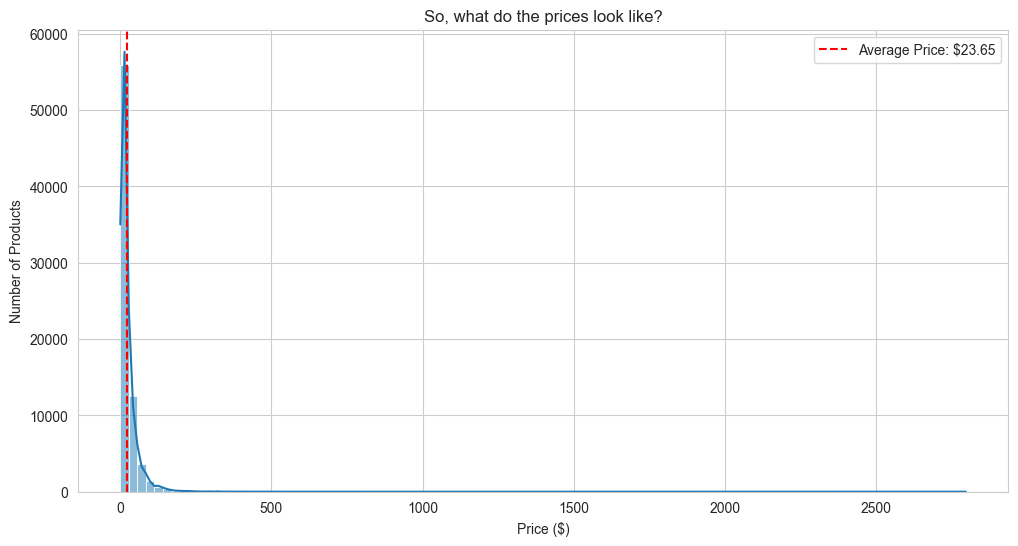

In [5]:
# histogram
sns.histplot(train_df['price'], bins=100, kde=True)

# Just adding a title and labels 
plt.title("So, what do the prices look like?")
plt.xlabel("Price ($)")
plt.ylabel("Number of Products")

#show where the average price is.
plt.axvline(train_df['price'].mean(), color='red', linestyle='--', label=f"Average Price: ${train_df['price'].mean():.2f}")
plt.legend()

#plot!
plt.show()

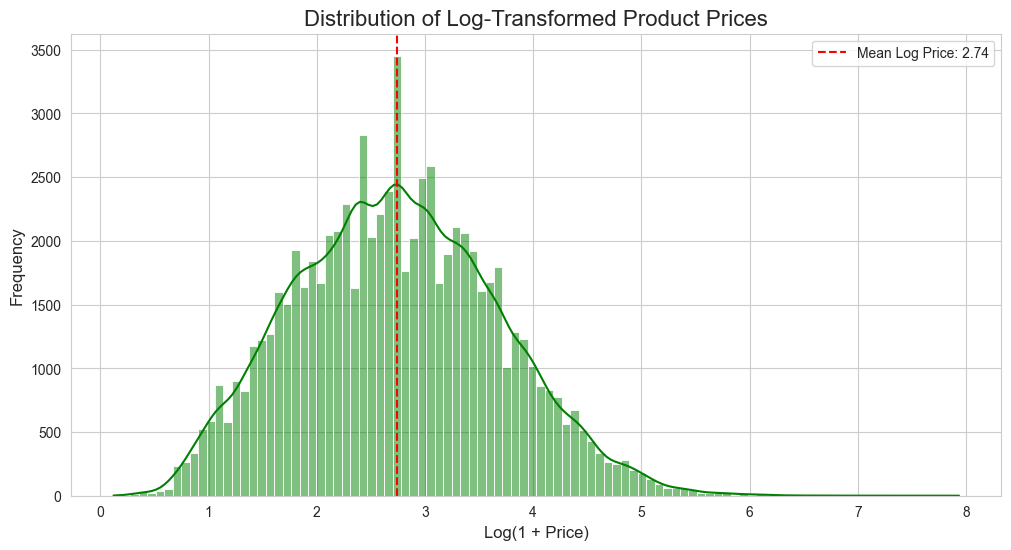

In [6]:
# --- Apply a log transformation to the price to handle the skew ---
train_df['log_price'] = np.log1p(train_df['price'])
# histogram of the log-transformed prices
sns.histplot(train_df['log_price'], bins=100, kde=True, color='green')
plt.title('Distribution of Log-Transformed Product Prices', fontsize=16)
plt.xlabel('Log(1 + Price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show where the mean log price is
plt.axvline(train_df['log_price'].mean(), color='red', linestyle='--', label=f"Mean Log Price: {train_df['log_price'].mean():.2f}")
plt.legend()

# Plot!
plt.show()